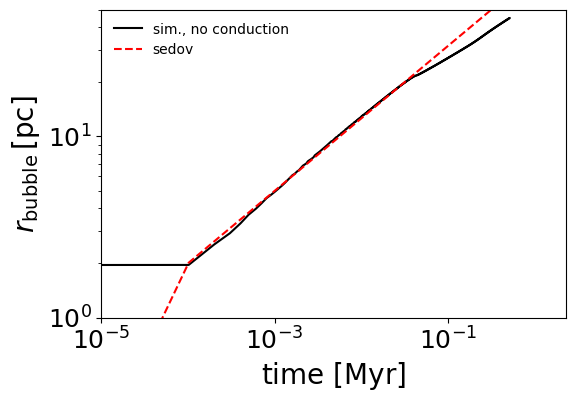

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import athena_utils

r_min = 0.5 # minimum radius of the domain
paths = ['../../bin/SNe.hst']
    
all_time, all_rbubble = [], []
for path in paths:
    data = np.genfromtxt(path)
    time_Myr = data[:, 0]
    Vbubble = data[:, 12]
    r_bubble = (3*Vbubble/(4*np.pi) + r_min**3)**(1/3)
    all_time.append(time_Myr)
    all_rbubble.append(r_bubble)
    
#interpolate to a wider grid to get rid of choppiness
# t_grid = np.linspace(0, np.max(time_Myr), 500)
# t_cen = t_grid[:-1] + 0.5*np.diff(t_grid)
# rdot_bubble = np.diff(np.interp(t_grid, time_Myr, r_bubble))/np.diff(t_grid)
t_grid = time_Myr

r_sed = athena_utils.sedov_taylor_radius(t_Myr = t_grid, 
    E51 = 1,  n_amb0 = 1)

# r_pds = athena_utils.pressure_driven_snowplow_radius(t_Myr = t_grid, 
#     E51 = 1, delta_t = 0.1, n_amb0 = 1)

# r_mds = athena_utils.momentum_driven_snowplow_radius(t_Myr = t_grid, 
#     pstar5 = 1, delta_t = 0.1, n_amb0 = 1)

f = plt.figure(figsize= (6, 4))
ax=f.add_subplot(111)
ax.semilogy(all_time[0], all_rbubble[0], 'k', label = r'sim., no conduction')
# ax.semilogy(all_time[1], all_rbubble[1], 'k-.', label = r'sim., with conduction')
ax.semilogy(t_grid, r_sed, 'r--', label = r'sedov')
# ax.semilogy(t_grid, r_pds, 'b:', label = r'pressure-driven snowplow')
# ax.semilogy(t_grid, r_mds, 'b:', label = r'momentum-driven snowplow')
ax.set_xscale('log')
ax.set_xlim(1.e-5, 2.3)
ax.set_ylim(1, 50)
ax.tick_params(labelsize = 18)
ax.set_ylabel(r'$r_{\rm bubble}\,[\rm pc]$', fontsize = 20)
ax.set_xlabel(r'$\rm time\,\,[\rm Myr]$', fontsize = 20)
ax.legend(loc = 'best', frameon= False)



In [4]:
import athena_read
import athena_utils

def get_profile(path):
    data_1d = athena_read.vtk(filename = path)
    r_edges_pc = data_1d[0]
    r_pc = r_edges_pc[:-1] + 0.5*np.diff(r_edges_pc)
    press = data_1d[3]['press'][0][0]
    rho = data_1d[3]['rho'][0][0]
    vr = data_1d[3]['vel'][0][0][:, 0]
    
    
    P_over_kb = athena_utils.get_pressure_from_code_units(P_code = press)
    nH_cm3, n_cm3 = athena_utils.get_n_from_code_pressure(rho_code = rho)
    T_K = P_over_kb/n_cm3
    return r_pc, nH_cm3, P_over_kb, vr, T_K


In [5]:
def plot_four_panel(path,ax=None,**kwargs):
    r, nH, pok, vr, T = get_profile(path)
    if ax is None: 
        f, ax = plt.subplots(2, 2, figsize = (10, 7))
        plt.subplots_adjust(hspace = 0.1, wspace = 0.35)
        ax[0, 0].set_xticklabels([]); ax[0, 1].set_xticklabels([])
        
    ax[0, 0].semilogy(r, nH, **kwargs)
    ax[0, 1].semilogy(r, pok, **kwargs)
    ax[1, 0].semilogy(r, T, **kwargs)
    ax[1, 1].plot(r, vr, **kwargs)

    ylabels = [r'$n_H\,\,[\rm cm^{-3}]$', r'$P/k_b\,\,[\rm K\,cm^{-3}]$',
            r'$T\,\,[\rm K]$', r'$v_r\,\,[\rm km\,s^{-1}]$']
    for ax_, ylabel in zip(ax.flatten(),ylabels):
        ax_.tick_params(labelsize = 18)
        ax_.set_ylabel(ylabel, fontsize = 20)
    ax[1, 0].set_xlabel(r'$r\,\,[\rm pc]$', fontsize = 20)
    ax[1, 1].set_xlabel(r'$r\,\,[\rm pc]$', fontsize = 20)
    return ax

In [6]:
import glob
pid = 'SNe'
paths = sorted(glob.glob(f'../../bin/{pid}.block0.out1.?????.vtk'))

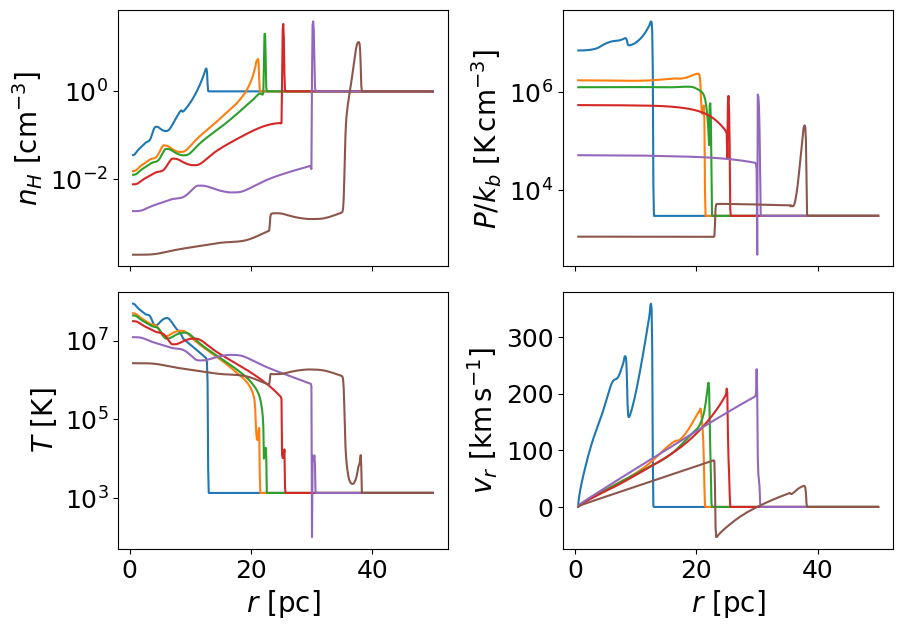

In [7]:
ax = None
for i in [10, 40, 50, 80, 150, 300]:
    ax = plot_four_panel(paths[i], ax=ax)